We should show the raw data distribution of the bandgap first in our final report. So this distributions or other distributions before performing ML on it can be done in this notebook

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("../data/RDKit/rdkit_only_valid_smiles_qm9.pkl")
# Check the info of the dataframe, especially important is the dtypes of the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129012 entries, 0 to 129011
Columns: 219 entries, MaxAbsEStateIndex to gaps
dtypes: float64(108), int64(110), object(1)
memory usage: 215.6+ MB
None


In [ ]:
x = df['gaps']
print(x)
print(min(x))
print(max(x))

0         13.736308
1          9.249149
2          9.836916
3          9.118535
4         10.329442
            ...    
129007     8.723970
129008     9.064113
129009     8.035522
129010     8.171579
129011     8.321241
Name: gaps, Length: 129012, dtype: float64
0.6694000959396362
16.928203582763672


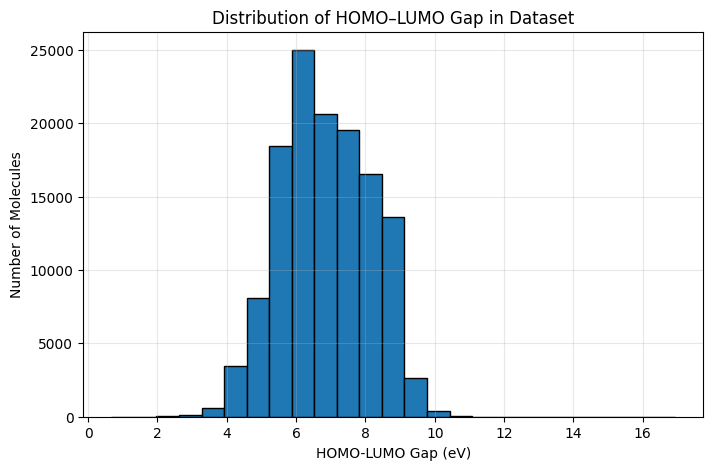

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(x, bins=25, edgecolor='black')
plt.xlabel('HOMO-LUMO Gap (eV)')
plt.ylabel('Number of Molecules')
plt.title('Distribution of HOMO–LUMO Gap in Dataset')
plt.grid(alpha=0.3)
plt.show()

In [ ]:

from rdkit import Chem
def count_c_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # invalid SMILES
    return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == "C")

# Apply to your dataframe
df["num_carbons"] = df["SMILES"].apply(count_c_atoms)
print(df["num_carbons"])

0         1
1         0
2         0
3         2
4         1
         ..
129007    8
129008    8
129009    7
129010    8
129011    7
Name: num_carbons, Length: 129012, dtype: int64


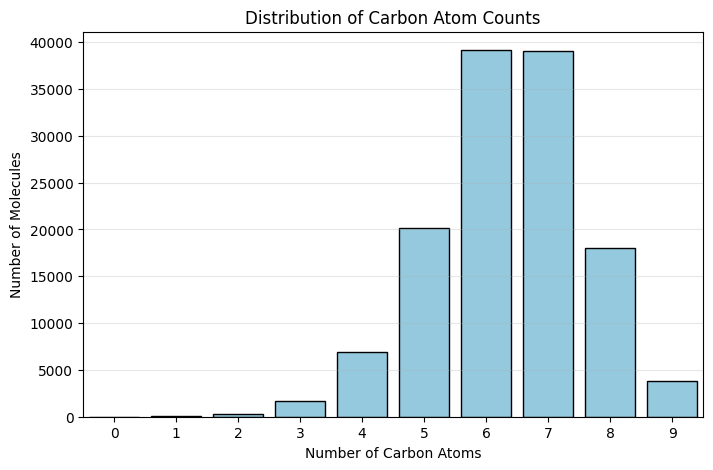

In [19]:

import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="num_carbons", data=df, color="skyblue", edgecolor="black")

plt.xlabel("Number of Carbon Atoms")
plt.ylabel("Number of Molecules")
plt.title("Distribution of Carbon Atom Counts")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()


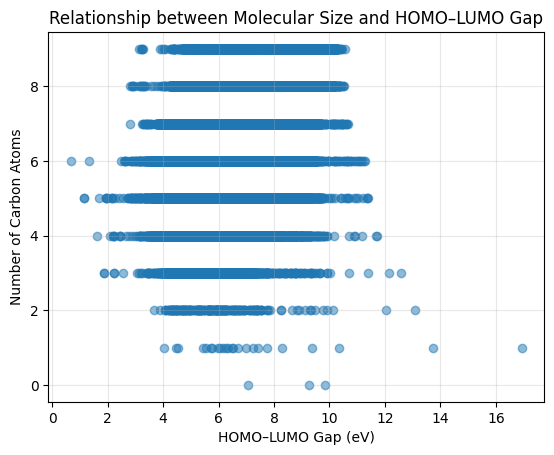

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x, df["num_carbons"], alpha=0.5)
plt.ylabel("Number of Carbon Atoms")
plt.xlabel("HOMO–LUMO Gap (eV)")
plt.title("Relationship between Molecular Size and HOMO–LUMO Gap")
plt.grid(alpha=0.3)
plt.show()

In [23]:
no_carbons = df[df["num_carbons"] == 0]
print(no_carbons)


     MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
1             0.000000        0.000000              0.000           0.000   
2             0.000000        0.000000              0.000           0.000   
172           3.861111        3.861111              2.875           2.875   

          qed  SPS   MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
1    0.397555  0.0  17.031          14.007   17.026549                    8   
2    0.327748  0.0  18.015          15.999   18.010565                    8   
172  0.387251  8.0  72.027          72.027   72.007211                   26   

     ...  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
1    ...                  0             0            0            0   
2    ...                  0             0            0            0   
172  ...                  0             0            0            0   

     fr_thiophene  fr_unbrch_alkane  fr_urea        SMILES      gaps  \
1               0